## Задание №1

В программе ниже сформирована обучающая выборка x_train, y_train и тестовая x_test, y_test.

Используя метрику Минковского:

$$ρ(x_k,x_m) = (\sum_ {i=1}^n w_i⋅ ∣x_k^i - x_m^i∣^p )^{1/p} $$

с параметром p=1 и весами $w_i = 1 ∀i$ методом k-ближайших соседей выполните классификацию образов тестовой выборки x_test при k = 5. Результат классификации сохраните (по порядку) в списке ``predict``.

Вычислите показатель качества классификации образов тестовой выборки по формуле:

$$Q(a,X) = \sum_ {i=1}^n [a(x_i) \not = y_i] $$

и сохраните результат в переменной ``Q``.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data_x = [(4.9, 3.3), (5.6, 4.5), (6.4, 4.3), (6.7, 5.7), (6.3, 5.0), (5.2, 3.9), (5.5, 3.7), (5.6, 3.6), (5.5, 3.8), (6.1, 4.7), (7.4, 6.1), (6.0, 5.1), (5.5, 4.4), (5.9, 5.1), (6.5, 5.8), (6.5, 4.6), (6.7, 4.4), (6.3, 5.6), (5.9, 4.8), (6.0, 4.5), (5.6, 4.1), (5.6, 4.9), (4.9, 4.5), (6.2, 4.5), (6.1, 4.7), (6.1, 4.9), (6.2, 5.4), (5.7, 4.2), (6.1, 5.6), (5.8, 4.0), (6.6, 4.6), (5.6, 4.2), (7.2, 6.1), (7.7, 6.7), (5.6, 3.9), (7.7, 6.9), (6.0, 4.0), (6.1, 4.0), (7.6, 6.6), (5.1, 3.0), (6.3, 6.0), (6.7, 5.7), (6.8, 5.9), (6.4, 5.5), (7.0, 4.7), (5.8, 5.1), (5.8, 5.1), (6.4, 5.3), (6.3, 4.9), (6.4, 5.3), (5.7, 3.5), (7.2, 5.8), (6.4, 5.6), (5.7, 4.5), (6.0, 4.5), (7.7, 6.1), (6.2, 4.3), (7.1, 5.9), (7.3, 6.3), (5.0, 3.3), (6.3, 5.1), (5.8, 3.9), (6.4, 4.5), (6.3, 5.6), (6.8, 5.5), (6.9, 5.4), (5.5, 4.0), (5.7, 4.1), (6.5, 5.5), (6.3, 4.7), (5.0, 3.5), (6.7, 5.8), (6.9, 4.9), (7.7, 6.7), (5.8, 4.1), (6.4, 5.6), (6.7, 5.2), (6.7, 4.7), (5.4, 4.5), (6.8, 4.8), (5.7, 4.2), (5.5, 4.0), (6.3, 4.9), (6.5, 5.2), (5.8, 5.1), (6.0, 4.8), (6.2, 4.8), (6.5, 5.1), (7.9, 6.4), (6.7, 5.0), (6.7, 5.6), (6.0, 5.0), (6.1, 4.6), (5.7, 5.0), (7.2, 6.0), (6.3, 4.4), (5.9, 4.2), (6.9, 5.1), (6.6, 4.4), (6.9, 5.7)]
data_y = [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1]

data_x = np.array(data_x)
data_y = np.array(data_y)

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn.fit(x_train, y_train)

predict = knn.predict(x_test)
Q = sum(predict != y_test)

Визуально образы этой выборки распределены в двумерном пространстве признаков следующим образом:

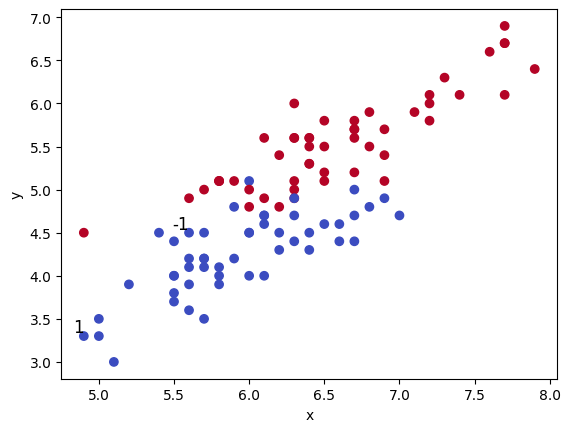

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([xx[0] for xx in data_x])
y = np.array([xx[1] for xx in data_x])

plt.scatter(x, y, c=data_y, cmap='coolwarm', marker='o') 

plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Задание №2

В программе ниже сформирована обучающая выборка x_train, y_train и тестовая x_test, y_test для задачи многоклассовой классификации с метками классов 
Y={0,1,2}

Реализуйте алгоритм k ближайших соседей с параметром k = 5 и евклидовой метрикой:

$$ρ(x_k, x_m) = \sum_{i=1}^n (x_k^i - x_m^i)^2 $$

для классификации объектов тестовой выборки x_test по размеченным данным x_train, y_train. Результат классификации (по порядку) сохраните в списке ``predict``.

Вычислите показатель качества классификации тестовой выборки по формуле:

$$Q(a,X) = \frac{1}{l} \sum_ {i=1}^l [a(x_i) \not = y_i] $$

и сохраните результат в переменной ``Q``.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)
n_feature = 5 # количество признаков

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7, -2, 4, 6]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * 0.5
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r3 = -0.7
D3 = 1.0
mean3 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * -0.5
V3 = [[D3 * r3 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2, N3 = 100, 120, 90
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T
x3 = np.random.multivariate_normal(mean3, V3, N3).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N1), np.ones(N2), np.ones(N3) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

predict = knn.predict(x_test)
Q = np.mean(predict != y_test)